In [14]:
from urllib.parse import quote_plus
from sqlalchemy import create_engine
import pandas as pd

# Your credentials
username = "root"
password = "set15"  # Password with special character @
host = "localhost"
database = "onlineecommerce"

# URL-encode the password
encoded_password = quote_plus(password)

# Create the connection URL
connection_url = f"mysql+pymysql://{username}:{encoded_password}@{host}/{database}"

# Create the SQLAlchemy engine
engine = create_engine(connection_url)

# Define and execute your query
query = "SELECT * FROM Orders;"
orders_df = pd.read_sql(query, engine)

# Close the connection
engine.dispose()

# Display the first few rows
orders_df.head()


,ROW ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Shipping Cost,Profit,Order Priority
0,26341,CA-2012-124891,31-7-2012,31-7-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,933.57,762.1845,Critical
1,26341,IN-2013-77878,5-2-2013,7-2-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,923.63,-288.7650,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,915.49,919.9710,Medium
3,13524,ES-2013-1579342,28-1-2013,30-1-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,910.16,-96.5400,Medium
4,47221,SG-2013-4320,5-11-2013,6-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,903.04,311.5200,Critical


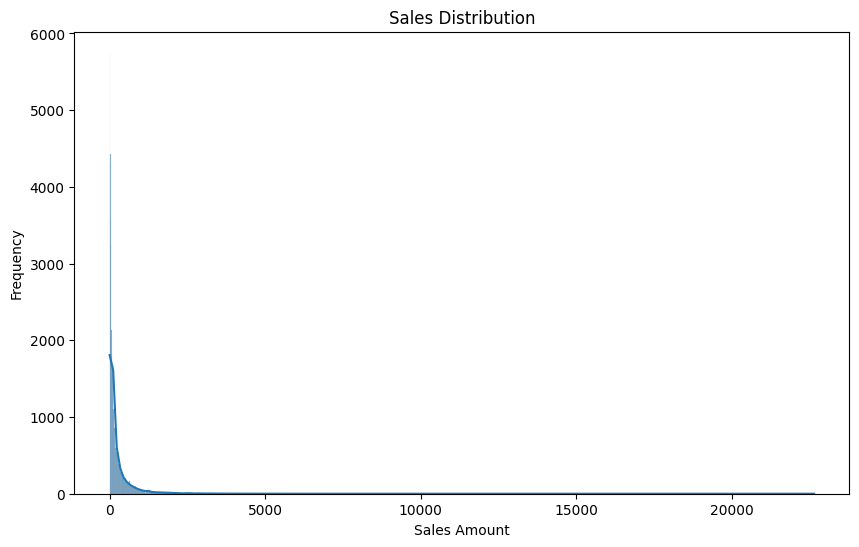

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(orders_df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


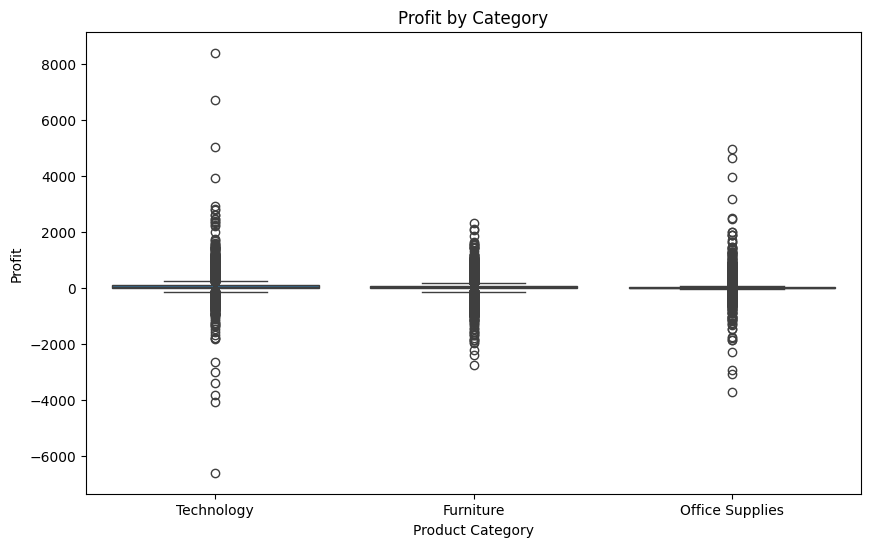

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=orders_df, x="Category", y="Profit")
plt.title("Profit by Category")
plt.xlabel("Product Category")
plt.ylabel("Profit")
plt.show()

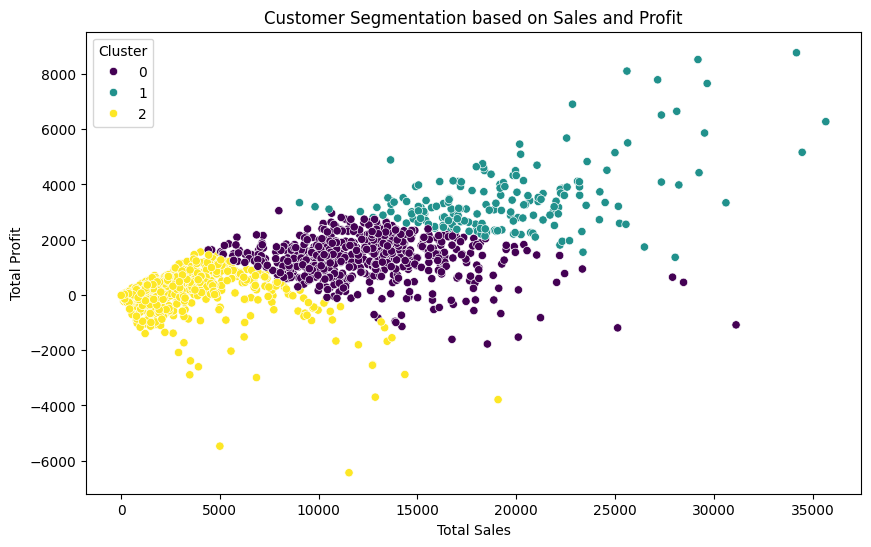

In [32]:

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Aggregate Sales and Profit by Customer ID
customer_data = orders_df.groupby('Customer ID').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Step 2: Scale the data for clustering
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['Sales', 'Profit']])

# Step 3: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Step 4: Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_data, x='Sales', y='Profit', hue='Cluster', palette='viridis')
plt.title("Customer Segmentation based on Sales and Profit")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.legend(title='Cluster')
plt.show()



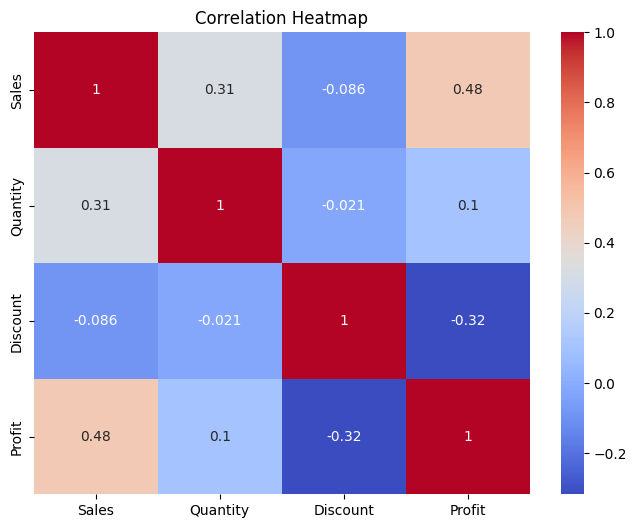

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(orders_df[['Sales', 'Quantity', 'Discount', 'Profit']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
